In [6]:
exec(open("objet.py").read(), globals())

In [12]:
Param1 = np.linspace(0.2, 0.6, 5)
Param2 = np.linspace(0.2, 0.6, 5)
finaltime = 500

NN_T = np.zeros((len(Param1), len(Param2), O.NbreIte))
WW_T = np.zeros_like(NN_T)

Init = [0.5, 0.5]
for i, param1 in enumerate(Param1):
    for j, param2 in enumerate(Param2):
        O = Ode(model = "allee_effect_adi", Init = Init, Param_phy=[param1, param2], finalTime=finaltime)
       # print(O.NbreIte)
        #print(O.Time)
        Y = O.solve().transpose()
        NN_T[i,j,:] = Y[0]
        WW_T[i,j] = Y[1]

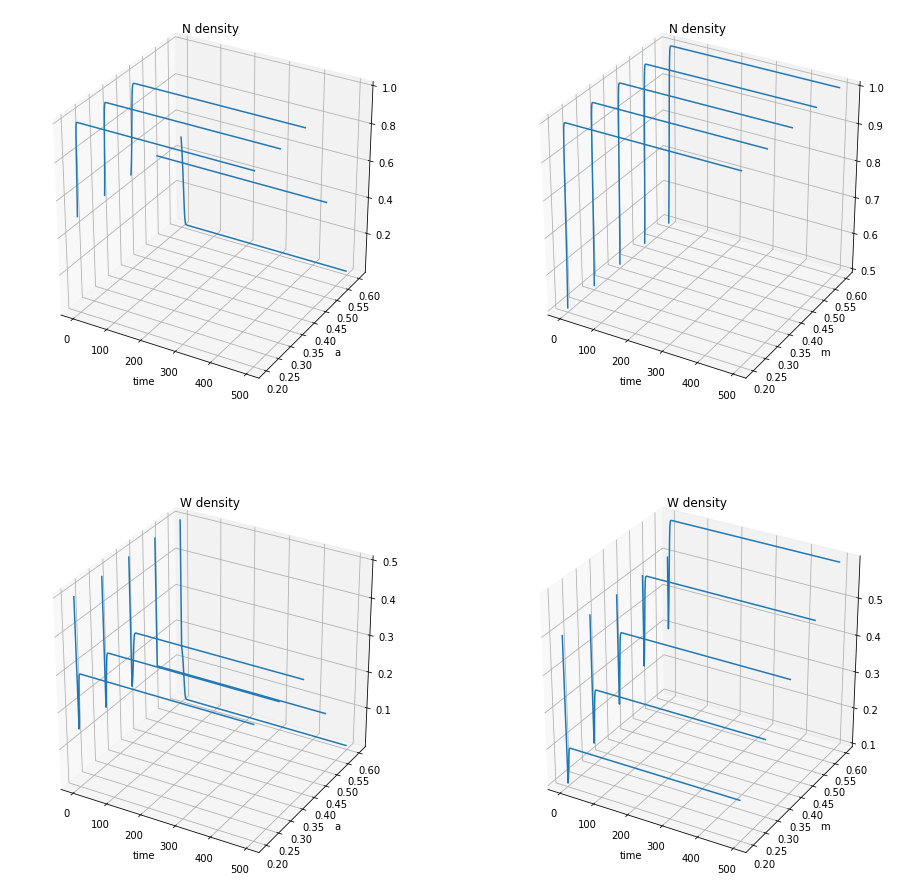

In [14]:
#fig, [ax1, ax2] = plt.subplots(figsize = (16, 16), ncols = 2, nrows=2)

fig = plt.figure(figsize= (16, 16))

ax = fig.add_subplot(2, 2, 1, projection='3d')
X, Y = np.meshgrid(O.Time, Param1)
plt.title("N density")
plt.xlabel("time")
plt.ylabel("a")
ax.plot_wireframe(X, Y, NN_T[:,len(Param2)//4,:], rstride=1, cstride=0)

ax = fig.add_subplot(2, 2, 2, projection='3d')
X, Y = np.meshgrid(O.Time, Param2)
plt.title("N density")  
plt.xlabel("time")
plt.ylabel("m")
ax.plot_wireframe(X, Y, NN_T[len(Param1)//4,:,:], rstride=1, cstride=0)

ax = fig.add_subplot(2, 2, 3, projection='3d')
X, Y = np.meshgrid(O.Time, Param1)
plt.title("W density")
plt.xlabel("time")
plt.ylabel("a")
ax.plot_wireframe(X, Y, WW_T[:,len(Param2)//4,:], rstride=1, cstride=0)

ax = fig.add_subplot(2, 2, 4, projection='3d')
X, Y = np.meshgrid(O.Time, Param2)
plt.title("W density")
plt.xlabel("time")
plt.ylabel("m")
ax.plot_wireframe(X, Y, WW_T[len(Param1)//4,:,:], rstride=1, cstride=0)

plt.savefig("plot/times_series_3d")
plt.show()